Use decision trees to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good".

In [1]:
from google.colab import files
upload=files.upload()

Saving Fraud_check.csv to Fraud_check.csv


In [74]:
import numpy as np
import pandas as pd
df=pd.read_csv("Fraud_check.csv")
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [75]:
df1= ['Risky' if x <= 30000 else 'Good' for x in df['Taxable.Income']]
df.drop('Taxable.Income', axis=1, inplace=True)
df['Taxable.Income'] = df1
print(df)

    Undergrad Marital.Status  City.Population  Work.Experience Urban  \
0          NO         Single            50047               10   YES   
1         YES       Divorced           134075               18   YES   
2          NO        Married           160205               30   YES   
3         YES         Single           193264               15   YES   
4          NO        Married            27533               28    NO   
..        ...            ...              ...              ...   ...   
595       YES       Divorced            39492                7   YES   
596       YES       Divorced            55369                2   YES   
597        NO       Divorced           154058                0   YES   
598       YES        Married           180083               17    NO   
599        NO       Divorced           158137               16    NO   

    Taxable.Income  
0             Good  
1             Good  
2             Good  
3             Good  
4             Good  
..       

In [76]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [77]:
Columns_to_encode = ["Undergrad","Marital.Status","Urban","Taxable.Income"]
for columns in Columns_to_encode:
    df[columns] = LE.fit_transform(df[columns])
df

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable.Income
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
...,...,...,...,...,...,...
595,1,0,39492,7,1,0
596,1,0,55369,2,1,0
597,0,0,154058,0,1,0
598,1,1,180083,17,0,0


In [78]:
df.isna().sum()

Undergrad          0
Marital.Status     0
City.Population    0
Work.Experience    0
Urban              0
Taxable.Income     0
dtype: int64

In [79]:
X = df[["Undergrad","Marital.Status","City.Population","Work.Experience","Urban"]]
Y = df["Taxable.Income"]

In [80]:
X

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [81]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Taxable.Income, Length: 600, dtype: int64

In [82]:
np.unique(Y)

array([0, 1])

In [83]:
Y.value_counts()

0    476
1    124
Name: Taxable.Income, dtype: int64

In [84]:
list(df)

['Undergrad',
 'Marital.Status',
 'City.Population',
 'Work.Experience',
 'Urban',
 'Taxable.Income']

In [86]:
df.corr()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable.Income
Undergrad,1.000000,0.042407,0.079579,-0.005362,-0.000267,0.012523
Marital.Status,0.042407,1.000000,-0.001564,-0.002213,0.064562,0.006081
City.Population,0.079579,-0.001564,1.000000,0.013135,-0.040098,0.012225
Work.Experience,-0.005362,-0.002213,0.013135,1.000000,-0.094559,-0.001972
Urban,-0.000267,0.064562,-0.040098,-0.094559,1.000000,0.004830
Taxable.Income,0.012523,0.006081,0.012225,-0.001972,0.004830,1.000000


In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

In [88]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((480, 5), (120, 5), (480,), (120,))

In [89]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)

In [90]:
DTC.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [91]:
Y_pred_train = DTC.predict(X_train)
Y_pred_test = DTC.predict(X_test)

In [92]:
from sklearn.metrics import accuracy_score
ac1 = accuracy_score(Y_train,Y_pred_train)
ac2 = accuracy_score(Y_test,Y_pred_test)
print("Accuracy score for Training data: ", ac1.round(3))
print("Accuracy score for Test data: ", ac2.round(3))

Accuracy score for Training data:  0.79
Accuracy score for Test data:  0.808


BAGGING Model

In [93]:
from sklearn.ensemble import BaggingClassifier
BC = BaggingClassifier(base_estimator=DTC,
                      n_estimators=100,
                      max_samples=0.6,
                      max_features=0.7)
BC.fit(X_train,Y_train)
Y_pred_train = BC.predict(X_train)
Y_pred_test = BC.predict(X_test)

from sklearn.metrics import accuracy_score
ac1 = accuracy_score(Y_train,Y_pred_train)
ac2 = accuracy_score(Y_test,Y_pred_test)
print("Accuracy score for Training data: ", ac1.round(3))
print("Accuracy score for Test data: ", ac2.round(3))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy score for Training data:  0.79
Accuracy score for Test data:  0.808


RANDOM FORESTS Model

In [94]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=50,
                      max_samples=0.6,
                      max_features=0.7)
RFC.fit(X_train,Y_train)
Y_pred_train = RFC.predict(X_train)
Y_pred_test = RFC.predict(X_test)

from sklearn.metrics import accuracy_score
ac1 = accuracy_score(Y_train,Y_pred_train)
ac2 = accuracy_score(Y_test,Y_pred_test)
print("Accuracy score for Training data: ", ac1.round(3))
print("Accuracy score for Test data: ", ac2.round(3))

Accuracy score for Training data:  0.933
Accuracy score for Test data:  0.775


[Text(0.4583333333333333, 0.875, 'x[3] <= 2.5\nentropy = 0.742\nsamples = 480\nvalue = [379, 101]'),
 Text(0.25, 0.625, 'x[3] <= 1.5\nentropy = 0.422\nsamples = 35\nvalue = [32, 3]'),
 Text(0.16666666666666666, 0.375, 'x[2] <= 112313.5\nentropy = 0.575\nsamples = 22\nvalue = [19, 3]'),
 Text(0.08333333333333333, 0.125, 'entropy = 0.75\nsamples = 14\nvalue = [11, 3]'),
 Text(0.25, 0.125, 'entropy = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.6666666666666666, 0.625, 'x[2] <= 63521.0\nentropy = 0.761\nsamples = 445\nvalue = [347, 98]'),
 Text(0.5, 0.375, 'x[2] <= 54275.0\nentropy = 0.623\nsamples = 103\nvalue = [87, 16]'),
 Text(0.4166666666666667, 0.125, 'entropy = 0.706\nsamples = 78\nvalue = [63, 15]'),
 Text(0.5833333333333334, 0.125, 'entropy = 0.242\nsamples = 25\nvalue = [24, 1]'),
 Text(0.8333333333333334, 0.375, 'x[2] <= 140941.5\nentropy = 0.795\nsamples = 342\nvalue = [260, 82]'),
 Text(0.75, 0.1

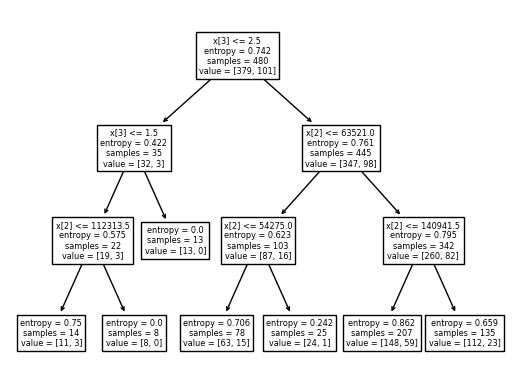

In [95]:
from sklearn import tree
tree.plot_tree(DTC)

AttributeError: ignored

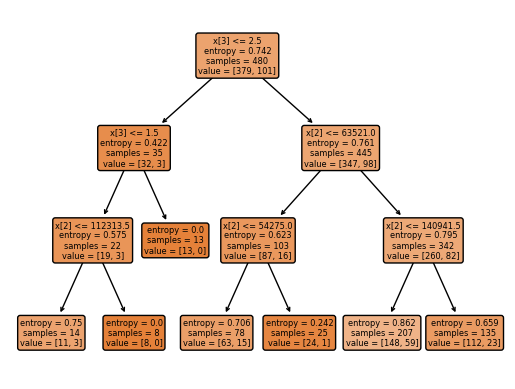

In [96]:
from sklearn import tree
import graphviz

Data = tree.plot_tree(DTC,filled=True,rounded= True)
Graph = graphviz.Source(Data)
Graph